In [133]:
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [76]:
path = 'telco_customer_churn.csv'
raw_df = pd.read_csv(path, index_col=0)
raw_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [4]:
telco=raw_df.copy()
telco.shape

(7043, 20)

In [5]:
telco.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [134]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [135]:
telco.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
telco['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [33]:
print(telco['TotalCharges'].dtype)

object


In [136]:
telco['TotalCharges'] = telco['TotalCharges'].replace(' ', np.nan)

telco['TotalCharges'] = telco['TotalCharges'].astype("float64")

telco['TotalCharges'] = telco['TotalCharges'].fillna(telco['TotalCharges'].mean())

In [45]:
telco['TotalCharges'] = telco['TotalCharges'].replace('?', np.nan)

In [46]:
telco.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
non_continues_col = telco[['SeniorCitizen']] #karena valuenya hanya 0 dan 1
non_continues_col.head()

,SeniorCitizen
customerID,
7590-VHVEG,0
5575-GNVDE,0
3668-QPYBK,0
7795-CFOCW,0
9237-HQITU,0


In [48]:
for col in non_continues_col.columns:
    print(col, np.unique(telco[col]))
    print("\n")

SeniorCitizen [0 1]




In [49]:
telco.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


<Axes: >

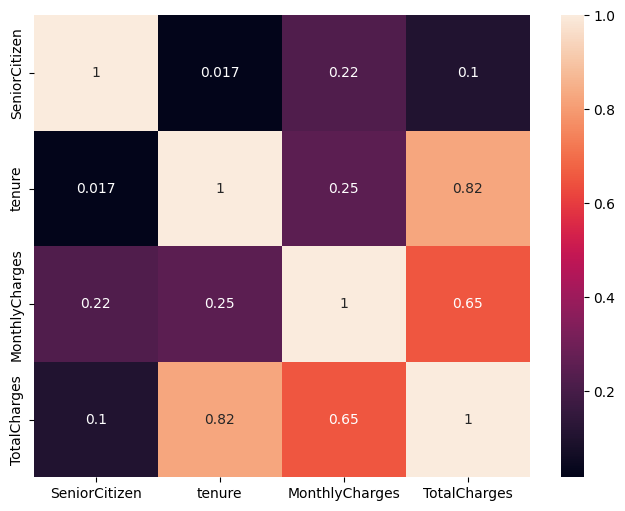

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(telco.corr(), annot = True)

Jumlah Row: 7043
Jumlah attribut: 9
Jumlah missing value : 0

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

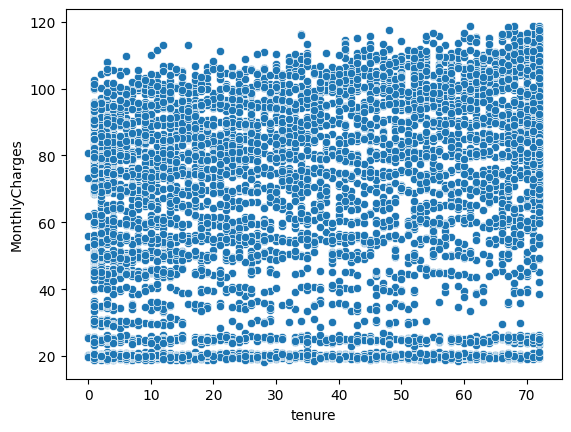

In [54]:
sns.scatterplot(x=telco['tenure'], y=telco['MonthlyCharges'])

Text(0, 0.5, 'MonthlyCharges')

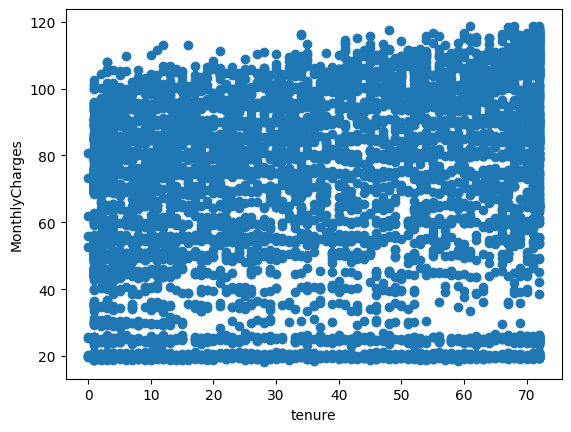

In [57]:
plt.scatter(x=telco['tenure'], y=telco['MonthlyCharges'])

plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')

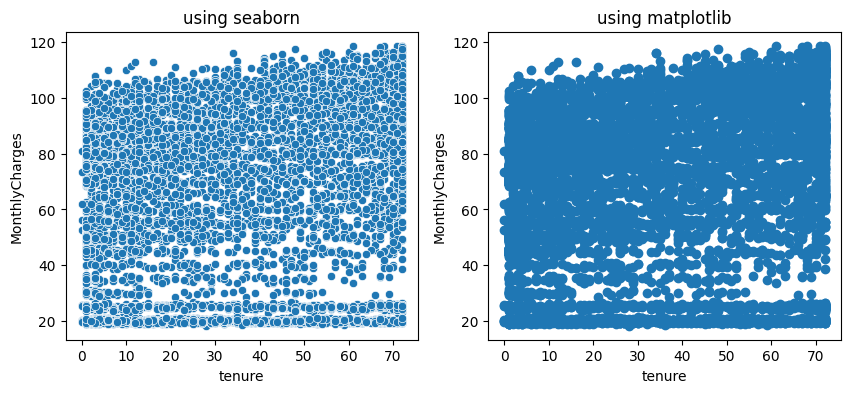

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=telco['tenure'], y=telco['MonthlyCharges'], ax=ax1)
ax1.title.set_text('using seaborn')

ax2.scatter(x=telco['tenure'], y=telco['MonthlyCharges'])

plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
ax2.title.set_text('using matplotlib')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

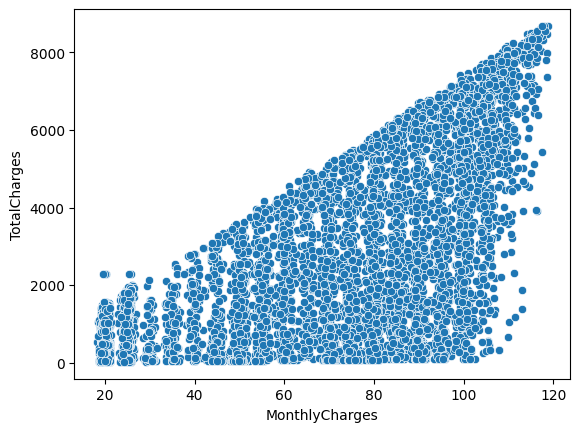

In [61]:
sns.scatterplot(x=telco['MonthlyCharges'], y=telco['TotalCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

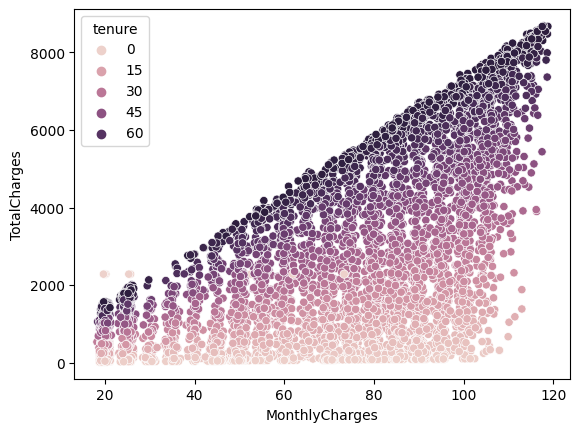

In [62]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", 
            data=telco, 
            hue="tenure")

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

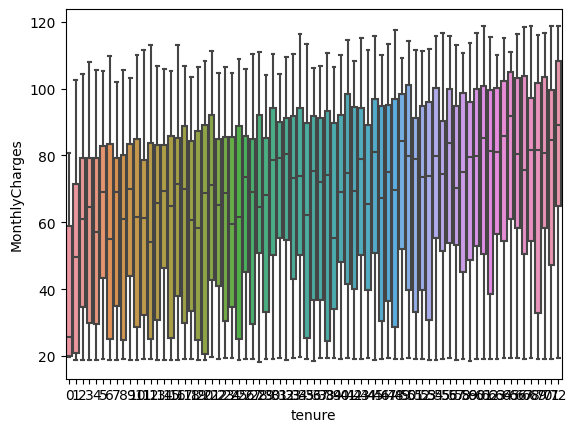

In [63]:
sns.boxplot(x=telco['tenure'],y=telco['MonthlyCharges'])

In [70]:
tenure_count = telco.groupby(['tenure'], as_index=False).size()
tenure_count.head(5)

,tenure,size
0,0,11
1,1,613
2,2,238
3,3,200
4,4,176


<Axes: xlabel='size', ylabel='tenure'>

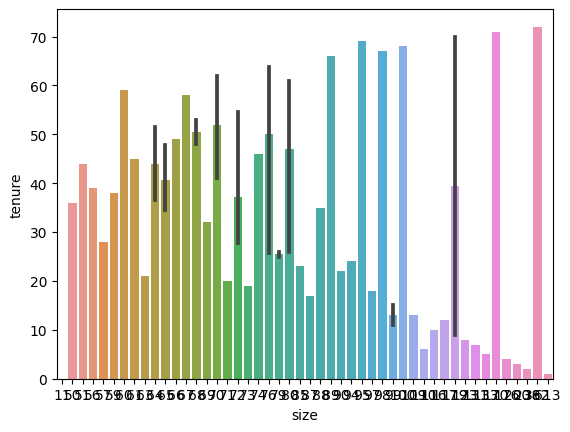

In [71]:
sns.barplot(x=tenure_count['size'], y=tenure_count['tenure'])

<Axes: xlabel='size', ylabel='tenure'>

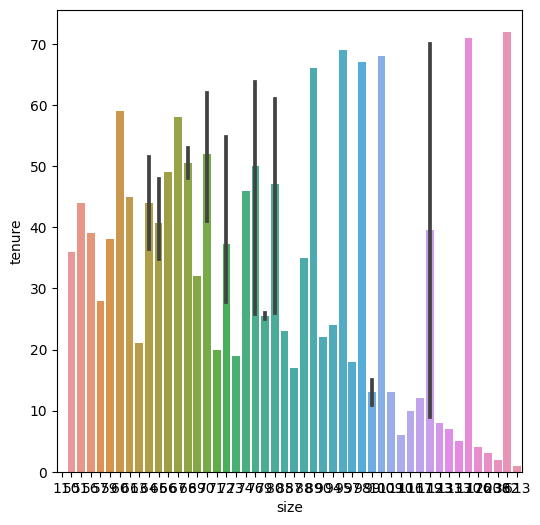

In [72]:
plt.figure(figsize=(6, 6))
sns.barplot(data=tenure_count, x='size', y='tenure')

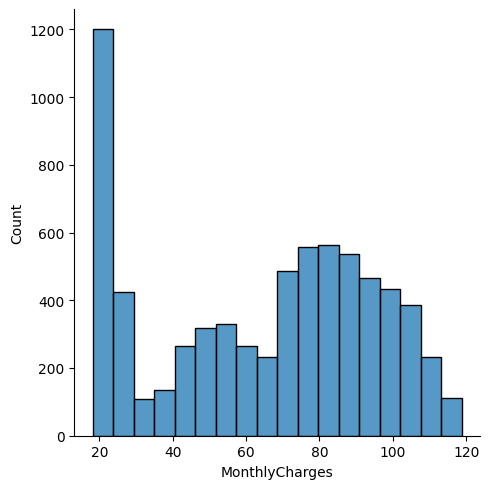

In [74]:
sns.displot(telco['MonthlyCharges'])

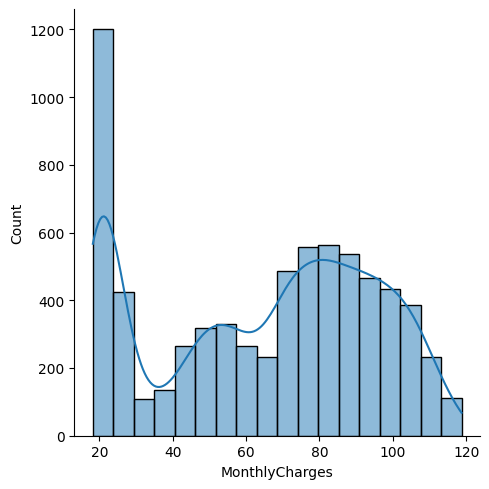

In [75]:
sns.displot(telco['MonthlyCharges'], kde = True)

In [143]:
jan_2017 = pd.read_csv('penumpang_bus_sekolah_januari_2017.csv')
feb_2017 = pd.read_csv('penumpang-bus-sekolah-februari-2017.csv')
mar_2017 = pd.read_csv('penumpang-bus-sekolah-maret-2017.csv')
apr_2017 = pd.read_csv('penumpang-bus-sekolah-april-2017.csv')
mei_2017 = pd.read_csv('penumpang-bus-sekolah-mei-2017.csv')
jun_2017 = pd.read_csv('penumpang-bus-sekolah-juni-2017.csv')
jul_2017 = pd.read_csv('penumpang-bus-sekolah-juli-2017.csv')
ags_2017 = pd.read_csv('penumpang-bus-sekolah-agustus-2017.csv')
sep_2017 = pd.read_csv('penumpang-bus-sekolah-september-2017.csv')
okt_2017 = pd.read_csv('penumpang-bus-sekolah-oktober-2017.csv')
nov_2017 = pd.read_csv('penumpang-bus-sekolah-november-2017.csv')
des_2017 = pd.read_csv('penumpang-bus-sekolah-desember-2017.csv')

In [144]:
merge = pd.merge(jan_2017, feb_2017, on='id', how='inner')
merge = pd.merge(merge, mar_2017, on='id', how='inner')
merge = pd.merge(merge, apr_2017, on='id', how='inner')
merge = pd.merge(merge, mei_2017, on='id', how='inner')
merge = pd.merge(merge, jun_2017, on='id', how='inner')
merge = pd.merge(merge, jul_2017, on='id', how='inner')
merge = pd.merge(merge, ags_2017, on='id', how='inner')
merge = pd.merge(merge, sep_2017, on='id', how='inner')
merge = pd.merge(merge, okt_2017, on='id', how='inner')
merge = pd.merge(merge, nov_2017, on='id', how='inner')
merge = pd.merge(merge, des_2017, on='id', how='inner')

KeyError: 'id'

In [162]:
from functools import reduce

merge = [jan_2017, feb_2017, mar_2017, apr_2017, mei_2017, jun_2017, jul_2017, ags_2017, sep_2017, okt_2017, nov_2017, des_2017]

In [161]:
df.assign(id=pd.Series(range(len(df))))
df.insert(loc=0, column='id', value=pd.Series(range(len(df))))

NameError: name 'df' is not defined

In [163]:
df_merged = reduce(lambda left,right: pd.merge(left,right,on='id',how='outer'), merge)

KeyError: 'id'